# _Time Series_

<img src=attachment:70cd5468-2fa0-4eca-926f-347ea81fde05.png height=500 width=500>

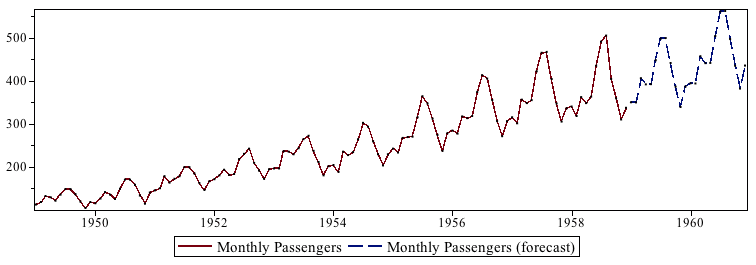

# <span style='color:purple;font-family:cursive'>TOC</span>
1. [**_Pandas Data Reader_**](#Pandas-Data-Reader)
2. [**_Resampling_**](#Time-Resampling)
3. [**_Rolling_**](#Rolling)
4. [**__**](#)

In [2]:
# !pip install pandas-datareader

# Pandas Data Reader

#### <span style='color:red;font-family:cursive'>It helps to read multiple time series files like stock market analysis and more. </span>

In [16]:
import pandas_datareader as pdr
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from IPython import display 
display.set_matplotlib_formats('svg')
import warnings 
warnings.filterwarnings('ignore')

#### <span style='color:red;font-family:cursive'>But it need api key, let's see how to read without api</span>

In [6]:
data_tesla = pdr.get_data_yahoo('TSLA') # This helps to get the data past 5 years 
data_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


## <span style='color:green;font-family:cursive'>Let's start ploting </span>

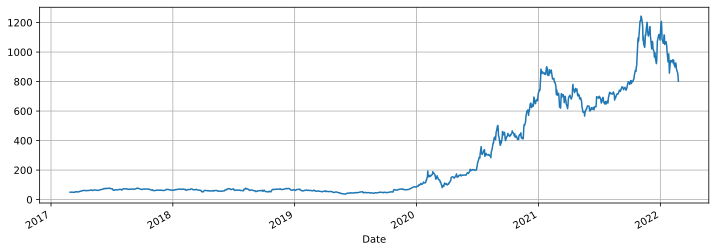

In [17]:
data_tesla['High'].plot(figsize=(12,4));
plt.grid()

#### <span style='color:red;font-family:cursive'>Let's give X limit and Y limit</span>

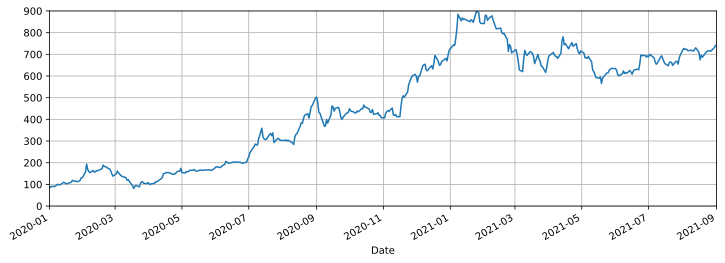

In [20]:
data_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim = [0, 900], figsize=(12,4));
plt.grid()

#### <span style='color:red;font-family:cursive'>Let's apply color and line style</span>

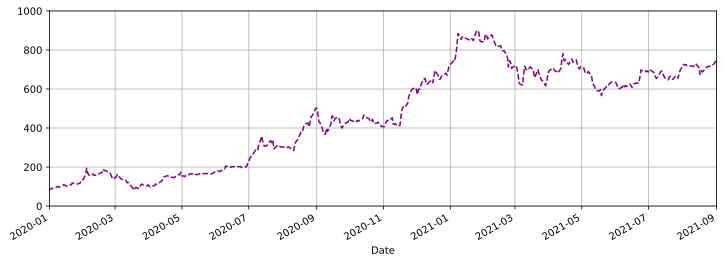

In [24]:
data_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim = [0, 1000], figsize=(12,4), c = 'purple', linestyle = '--');
plt.grid()

#### <span style='color:red;font-family:cursive'>Let's read the specific index</span>

In [30]:
index = data_tesla.loc['2020-01-01':'2021-09-01'].index

In [26]:
share_open = data_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [28]:
share_open # for better visulaization: ) 

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

#### <span style='color:red;font-family:cursive'>Let's create a subplots</span>

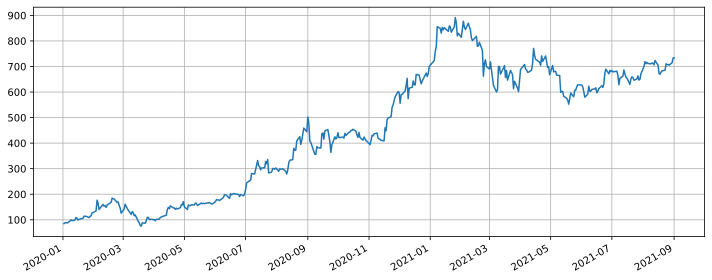

In [44]:
figure, ax = plt.subplots(figsize = (10,4))
figure.autofmt_xdate() # Auto Format x axis data - helps to format in better way :
ax.plot(index, share_open)
plt.tight_layout()
plt.grid();

In [47]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

#### <span style='color:red;font-family:cursive'>Let's set our index to date for better visualition</span>

In [51]:
data_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
...,...,...,...,...,...,...
2022-02-17,918.500000,874.099976,913.260010,876.349976,18392800.0,876.349976
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029


<span style='color:red;font-family:cursive'>To work with Time Series, you should familar with Datetime library</span>

In [54]:
datetime(2021, 11, 21) # year - month - date

datetime.datetime(2021, 11, 21, 0, 0)

In [55]:
datetime.now() # helps to show our current time

datetime.datetime(2022, 2, 25, 19, 34, 20, 235353)

#### <span style='color:red;font-family:cursive'>Let's create a function to find how time a cell is taking</span>

In [57]:
def counter(num1, num2):
    return num1 + num2

start_time = datetime.now()
num1 = 20 
num2 = 30 
counter(num1, num2)
end_time = datetime.now()
print(start_time - end_time)

0:00:00


### <span style='color:purple;font-family:cursive'>**Super Fast**</span>

In [61]:
date = datetime(22, 11, 21)

print(date.date())
print(date.day)
print(date.year)
print(date.hour)

0022-11-21
21
22
0


# Time Resampling

In [64]:
data_tesla.resample(rule = 'A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.402000,48.838001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


### <span style='color:red;font-family:cursive'>RuleA - Year and frequency, Rule QS - Quartely Information, Rule BA - Business End frequency, Rule M - Monthly</span>

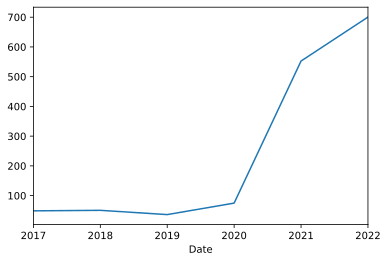

In [66]:
data_tesla.resample(rule = 'A').min()['Open'].plot();

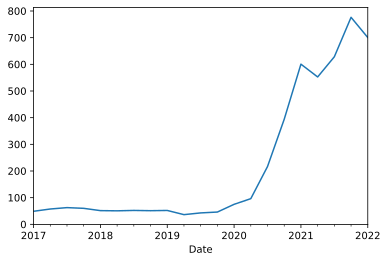

In [67]:
data_tesla.resample(rule = 'QS').min()['Open'].plot();

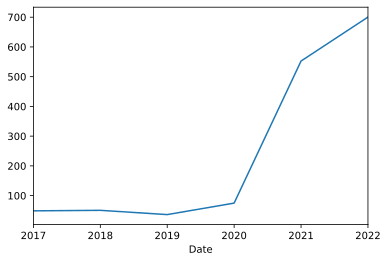

In [70]:
data_tesla.resample(rule = 'BA').min()['Open'].plot();

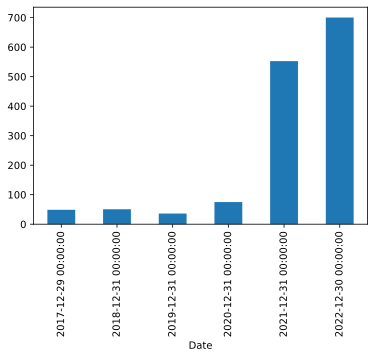

In [71]:
data_tesla.resample(rule = 'BA').min()['Open'].plot(kind = 'bar');

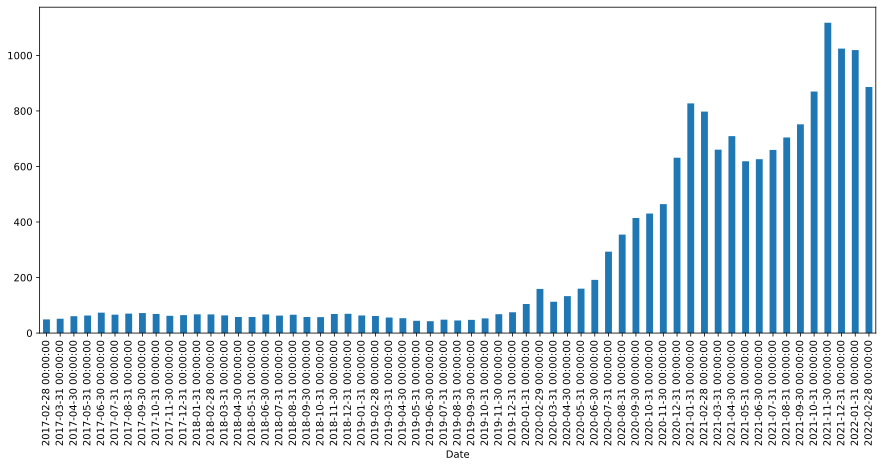

In [74]:
data_tesla.resample(rule = 'M').mean()['Open'].plot(kind = 'bar', figsize = (15,6));

# Rolling

* It just calcualte the mean for the rolling windows
* In another term, it helps to make our function smotther. 

In [77]:
data_tesla['High'].rolling(10).mean().head(20)

Date
2017-02-27        NaN
2017-02-28        NaN
2017-03-01        NaN
2017-03-02        NaN
2017-03-03        NaN
2017-03-06        NaN
2017-03-07        NaN
2017-03-08        NaN
2017-03-09        NaN
2017-03-10    50.2042
2017-03-13    50.1740
2017-03-14    50.3164
2017-03-15    50.4394
2017-03-16    50.6888
2017-03-17    50.9574
2017-03-20    51.2144
2017-03-21    51.4326
2017-03-22    51.5326
2017-03-23    51.7128
2017-03-24    52.0606
Name: High, dtype: float64

In [80]:
data_tesla['30_days_rolling'] = data_tesla['Open'].rolling(window = 30).mean()

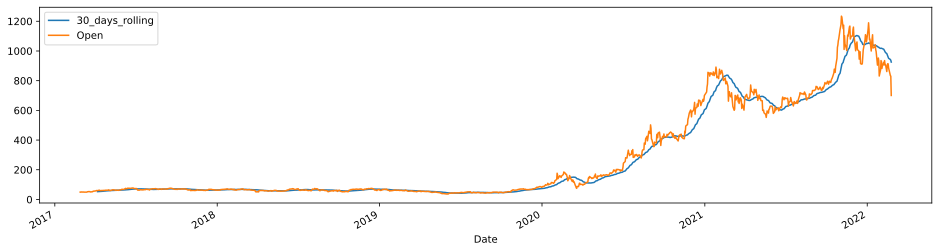

In [87]:
data_tesla[['30_days_rolling','Open']].plot(figsize = (16,4));

### Assingments
* <span style='color:red;font-family:cursive'>1. read the microsoft data using pandas data reader</span>
* <span style='color:red;font-family:cursive'>2. Get the maximum price of the share from 2017-2022</span>
* <span style='color:red;font-family:cursive'>3. which is the day highest price of the task</span>
* <span style='color:red;font-family:cursive'>4. Which is the day lowest price of the task</span>